# 종합실습문제1. 로그 데이터 분석

다음 데이터는 깃허브 서비스에서 요일 별 사용자들의 푸시 횟수로, 요일별로 푸시 횟수가 다르다고 한다. 분산분석을 수행하여 검증하시오.

- 데이터파일 : log_push.csv

### 필요 모듈 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%precision 5

'%.5f'

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'

#### 분산분석을 위한 모듈들 임포트

In [4]:
pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   --------------- ------------------------ 3.7/9.6 MB 19.8 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 23.5 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 23.0 MB/s  0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [s

In [10]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [12]:
pip install pingouin

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -------- ------------------------------- 1.8/8.7 MB 9.1 MB/s eta 0:00:01
   ---------------------------- ----------- 6.3/8.7 MB 14.9 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 14.7 MB/s  0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 14.1 MB/s  0:00:00

   ----- ---------------------------------- 1/7 [tabulate]
   ----- ---------------------------------- 1/7 [tabulate]
   ----------- ---------------------------- 2/7 [joblib]
   ----------- ---------------------------- 2/7 [joblib]
   ----------- ---------------------------- 2/7 [joblib]
   ----------- ---------------------------- 2/7 [joblib]
   ----------- ---------------------------- 2/7 [joblib]
   ----------- ---------------------------- 2/7 [joblib]
   ----------- ---------------------------- 2/7 [joblib]
   ----------- ----------------------------

In [19]:
import pingouin as pg

### 데이터 수집

In [20]:
df=pd.read_csv('ex_data/log_push.csv')

### 데이터 기초 정보 파악

: 데이터 일부, 변수, 관측값수, 결측치 여부, 변수의 데이터타입, 기술통계량 등을 확인

In [21]:
df.head()

,log_date,push_count
0,19-02-01,736729
1,19-02-02,511067
2,19-02-03,528724
3,19-02-04,709256
4,19-02-05,740087


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   log_date    348 non-null    object
 1   push_count  348 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.6+ KB


In [24]:
df.describe()

,push_count
count,3.480000e+02
mean,8.725456e+05
std,1.522160e+05
min,2.861550e+05
25%,7.229318e+05
50%,9.278870e+05
75%,9.864538e+05
max,1.135921e+06


### 데이터 가공

#### log_date컬럼을 이용하여 요일 컬럼(day_of_week) 생성

- log_date를 날짜형식으로 변경

In [25]:
df.log_date = pd.to_datetime(df.log_date, format='%y-%m-%d')
df.head()

,log_date,push_count
0,2019-02-01,736729
1,2019-02-02,511067
2,2019-02-03,528724
3,2019-02-04,709256
4,2019-02-05,740087


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   log_date    348 non-null    datetime64[ns]
 1   push_count  348 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.6 KB


- log_date를 이용하여 요일 컬럼(day_of_week) 생성

In [28]:
df['day_of_week']= df.log_date.dt.day_of_week
#0=Mon 6=Sun

In [30]:
df.head()

,log_date,push_count,day_of_week
0,2019-02-01,736729,4
1,2019-02-02,511067,5
2,2019-02-03,528724,6
3,2019-02-04,709256,0
4,2019-02-05,740087,1


- 요일 컬럼의 데이터를 범주형(Category)으로 변경

In [32]:
df['day'] = pd.cut(df.day_of_week, bins=[-1,0,1,2,3,4,5,6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
df.head()

,log_date,push_count,day_of_week,day
0,2019-02-01,736729,4,Fri
1,2019-02-02,511067,5,Sat
2,2019-02-03,528724,6,Sun
3,2019-02-04,709256,0,Mon
4,2019-02-05,740087,1,Tue


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   log_date     348 non-null    datetime64[ns]
 1   push_count   348 non-null    int64         
 2   day_of_week  348 non-null    int32         
 3   day          348 non-null    category      
dtypes: category(1), datetime64[ns](1), int32(1), int64(1)
memory usage: 7.6 KB


In [36]:
df['day2'] = df.log_date.dt.day_name()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   log_date     348 non-null    datetime64[ns]
 1   push_count   348 non-null    int64         
 2   day_of_week  348 non-null    int32         
 3   day          348 non-null    category      
 4   day2         348 non-null    object        
dtypes: category(1), datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 10.3+ KB


In [37]:
# df.day2 = df.day2.astype('category')
# df.day2.cat.rename_categories({0:'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun')

0        Friday
1      Saturday
2        Sunday
3        Monday
4       Tuesday
         ...   
343      Friday
344    Saturday
345      Sunday
346      Monday
347     Tuesday
Name: day2, Length: 348, dtype: category
Categories (7, object): ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

### 데이터 탐색 및 시각화

#### 요일별 빈도수

In [38]:
df.day.value_counts()

day
Mon    50
Tue    50
Fri    50
Sun    50
Sat    50
Wed    49
Thu    49
Name: count, dtype: int64

#### 요일별 push수에 대한 기술통계량

In [39]:
df.groupby(by='day')['push_count'].describe()

C:\Users\dino1\AppData\Local\Temp\ipykernel_2936\321916857.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by='day')['push_count'].describe()


,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Mon,50.0,955284.360000,70766.469732,709256.0,921506.75,954091.0,1004844.25,1087212.0
Tue,50.0,987446.620000,83908.212000,693257.0,960108.25,987347.5,1015885.00,1135921.0
Wed,49.0,971072.448980,102305.775606,570350.0,945094.00,985706.0,1029029.00,1121567.0
Thu,49.0,952641.510204,118751.401232,286155.0,940762.00,963577.0,1008383.00,1109582.0
Fri,50.0,897827.440000,68275.935770,660287.0,872606.25,906519.5,928941.00,1022900.0
Sat,50.0,657864.100000,46452.600564,511067.0,636199.75,653765.0,696757.50,738410.0
Sun,50.0,689255.040000,51013.933708,528724.0,650460.50,695012.0,730139.75,766976.0


#### 요일별 push수에 대한 박스플롯

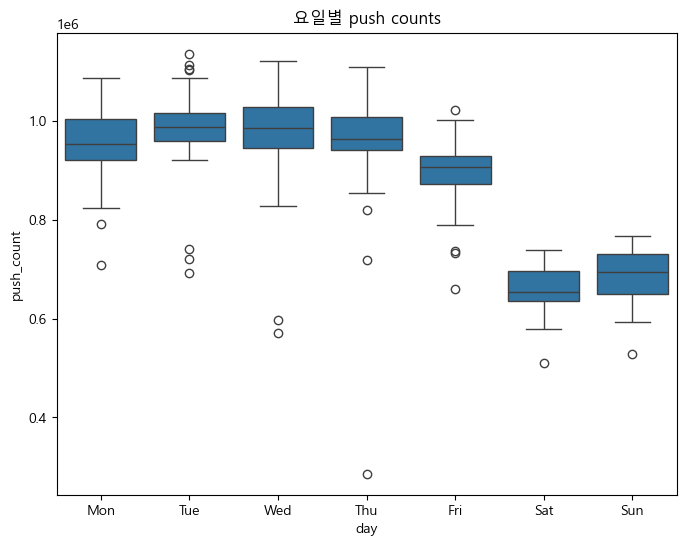

In [41]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='day', y='push_count')
plt.title('요일별 push counts')
plt.show()

#### push_count에 대한 요일별  히스토그램

- matplotlib을 이용하여 요일별 히스토그램을 한 윈도우에 겹쳐서 그리기

C:\Users\dino1\AppData\Local\Temp\ipykernel_2936\1373508795.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for d, g in df.groupby(by='day'):


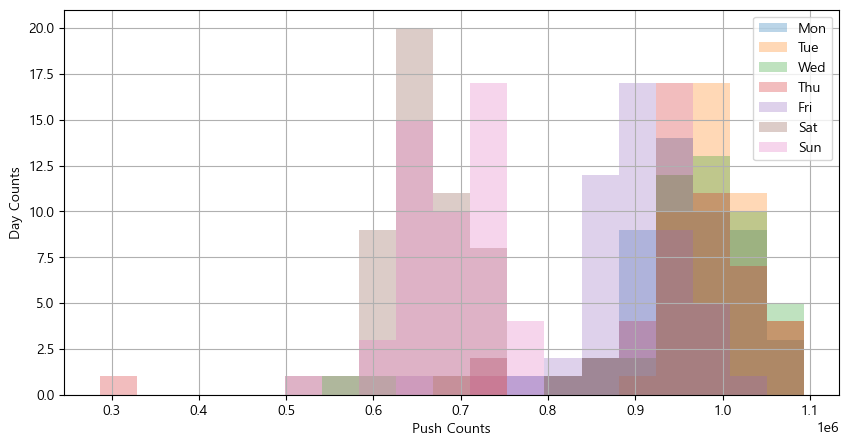

In [45]:
x_min = df.push_count.min()
x_max = df.push_count.max()
bins = np.arange(x_min, x_max, step=(x_max-x_min)/20)

plt.figure(figsize=(10,5))
legs = [] 
for d, g in df.groupby(by='day'):
    g.push_count.hist(bins=bins, alpha=0.3)
    legs.append(d)
plt.legend(legs)
plt.xlabel('Push Counts')
plt.ylabel('Day Counts')
plt.show()

- seaborn을 이용하여 요일별 히스토그램 그리기

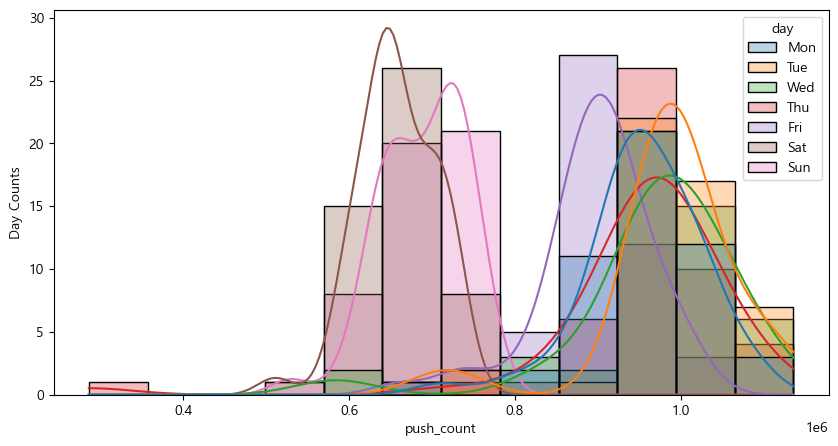

In [48]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='push_count', hue='day', alpha=0.3, kde=True)
plt.ylabel('Day Counts')
plt.show()

### 이상치 탐색 및 제거

In [54]:
outlier_index = []

for d, g in df.groupby(by = 'day'):
    q = g.push_count.quantile([0.25,0.75])
    iqr = q[0.75] - q[0.25]
    up_hinge = q[0.75] + iqr*1.5
    lw_hinge = q[0.25] - iqr*1.5
    outlier = g[(g.push_count > up_hinge) | (g.push_count < lw_hinge)] 
    out_idx = list(outlier.index)
    print(f'{d}의 이상치는 {len(out_idx)}개, index ={out_idx}')
    outlier_index = outlier_index + out_idx

df_no_outlier = df.drop(index=outlier_index)
df_no_outlier.head()

Mon의 이상치는 2개, index =[3, 332]
Tue의 이상치는 7개, index =[4, 284, 298, 305, 312, 326, 333]
Wed의 이상치는 2개, index =[327, 334]
Thu의 이상치는 3개, index =[153, 223, 328]
Fri의 이상치는 4개, index =[0, 224, 308, 329]
Sat의 이상치는 1개, index =[1]
Sun의 이상치는 1개, index =[2]


C:\Users\dino1\AppData\Local\Temp\ipykernel_2936\3568492653.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for d, g in df.groupby(by = 'day'):


,log_date,push_count,day_of_week,day,day2
5,2019-02-06,828340,2,Wed,Wednesday
6,2019-02-07,855820,3,Thu,Thursday
7,2019-02-08,876558,4,Fri,Friday
8,2019-02-09,711352,5,Sat,Saturday
9,2019-02-10,726738,6,Sun,Sunday


#### 이상치 제거 후 push_count의 요일별 박스플롯

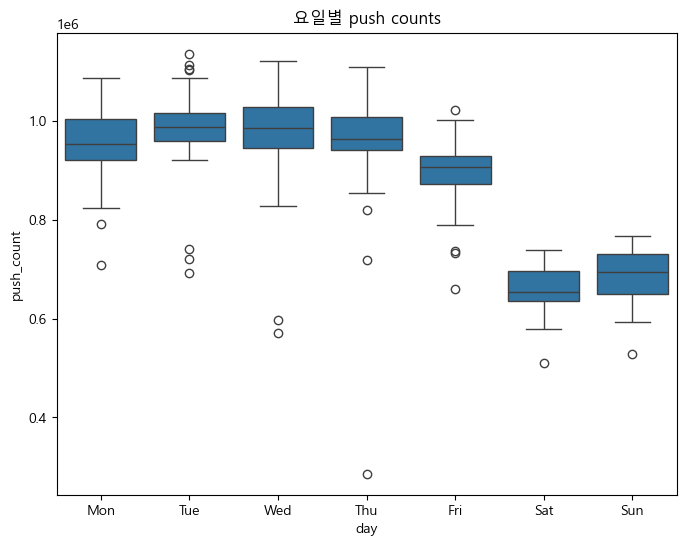

In [55]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='day', y='push_count')
plt.title('요일별 push counts')
plt.show()

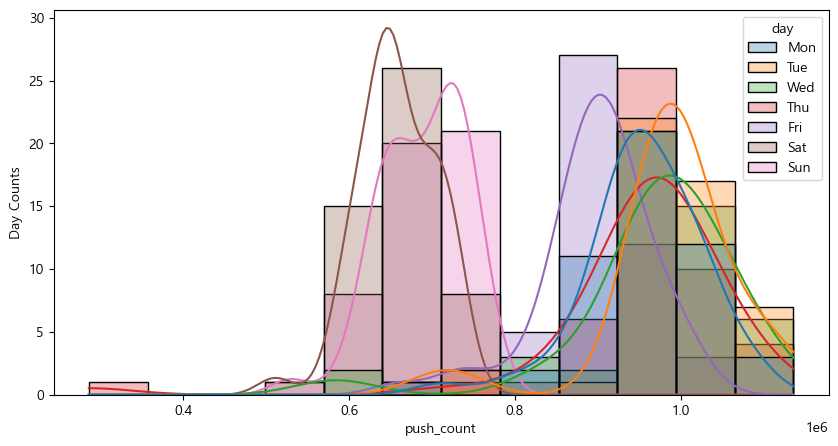

In [56]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='push_count', hue='day', alpha=0.3, kde=True)
plt.ylabel('Day Counts')
plt.show()

## 일원분산분석

### 1. 가설 설정

### 2. 정규성 검정

- 원 데이터로 요일별 push_count의 정규성 검정

In [61]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for d in days:
    stat, p = stats.shapiro(df.push_count[df.day==d])
    print(f'{d} : shprio stat(통계량)={stat:.3f}, p_value={p:.3f}')

Mon : shprio stat(통계량)=0.950, p_value=0.035
Tue : shprio stat(통계량)=0.803, p_value=0.000
Wed : shprio stat(통계량)=0.796, p_value=0.000
Thu : shprio stat(통계량)=0.643, p_value=0.000
Fri : shprio stat(통계량)=0.920, p_value=0.002
Sat : shprio stat(통계량)=0.962, p_value=0.112
Sun : shprio stat(통계량)=0.952, p_value=0.040


- 이상치 제거한 데이터로 요일별 push_count의 정규성 검정

In [62]:
print('정규성 검정 : 이상치 제거 데이터')
for d in days:
    stat, p = stats.shapiro(df_no_outlier.push_count[df_no_outlier.day==d])
    print(f'{d} : shprio stat(통계량)={stat:.3f}, p_value={p:.3f}')

정규성 검정 : 이상치 제거 데이터
Mon : shprio stat(통계량)=0.988, p_value=0.909
Tue : shprio stat(통계량)=0.953, p_value=0.077
Wed : shprio stat(통계량)=0.980, p_value=0.592
Thu : shprio stat(통계량)=0.978, p_value=0.536
Fri : shprio stat(통계량)=0.986, p_value=0.837
Sat : shprio stat(통계량)=0.963, p_value=0.127
Sun : shprio stat(통계량)=0.958, p_value=0.075


### 3. 등분산성 검정

- 이상치 제거한 데이터를 가지고 등분산성 검정

In [64]:
mon = df_no_outlier.push_count[df_no_outlier.day == 'Mon'] 
tue = df_no_outlier.push_count[df_no_outlier.day == 'Tue'] 
wed = df_no_outlier.push_count[df_no_outlier.day == 'Wed'] 
thu = df_no_outlier.push_count[df_no_outlier.day == 'Thu'] 
fri = df_no_outlier.push_count[df_no_outlier.day == 'Fri'] 
sat = df_no_outlier.push_count[df_no_outlier.day == 'Sat'] 
sun = df_no_outlier.push_count[df_no_outlier.day == 'Sun'] 

stat,p = stats.levene(mon, tue, wed, thu, fri, sat, sun)
print(f'stat = {stat:.3f}, p_value={p:.3f}')

stat = 2.171, p_value=0.046


### 4. 분산분석 수행
- 가정 검정 결과에 맞게 분석을 수행하시오.

In [65]:
# 등분산성을 만족하지 않은 경우 -> Welch ANOVA로 분석
pg.welch_anova(data = df_no_outlier, dv ='push_count', between='day')

,Source,ddof1,ddof2,F,p-unc,np2
0,day,6,142.151291,473.297915,2.720335e-91,0.878735


=> Welch ANOVA 분석 결과: p값이 매우 작아 그룹간 push count가 같다는 귀무가설을 기각하므로 요일별 push count가 다르다고 말할 수 있음

### 5. 사후검정 수행

- 어느 요일간에 차이가 있는가?

group1,group2,stat,pval,pval_corr,reject
Fri,Mon,-5.2099,0.0,0.0,True
Fri,Sat,27.1185,0.0,0.0,True
Fri,Sun,22.5774,0.0,0.0,True
Fri,Thu,-6.3535,0.0,0.0,True
Fri,Tue,-9.6368,0.0,0.0,True
Fri,Wed,-6.8689,0.0,0.0,True
Mon,Sat,29.7681,0.0,0.0,True
Mon,Sun,25.7302,0.0,0.0,True
Mon,Thu,-0.9745,0.3324,1.0,False
Mon,Tue,-2.9764,0.0038,0.0789,False


group1,group2,meandiff,p-adj,lower,upper,reject
Fri,Mon,56419.0417,0.0,25404.5307,87433.5526,True
Fri,Sat,-246525.5408,-0.0,-277384.7926,-215666.289,True
Fri,Sun,-214854.3163,-0.0,-245713.5681,-183995.0645,True
Fri,Thu,67736.5652,0.0,36393.8492,99079.2812,True
Fri,Tue,87068.314,0.0,55183.6088,118953.0191,True
Fri,Wed,80161.0319,0.0,48985.4783,111336.5855,True
Mon,Sat,-302944.5825,-0.0,-333470.4316,-272418.7333,True
Mon,Sun,-271273.358,-0.0,-301799.2071,-240747.5088,True
Mon,Thu,11317.5236,0.9329,-19696.9874,42332.0345,False
Mon,Tue,30649.2723,0.0634,-912.8643,62211.4089,False


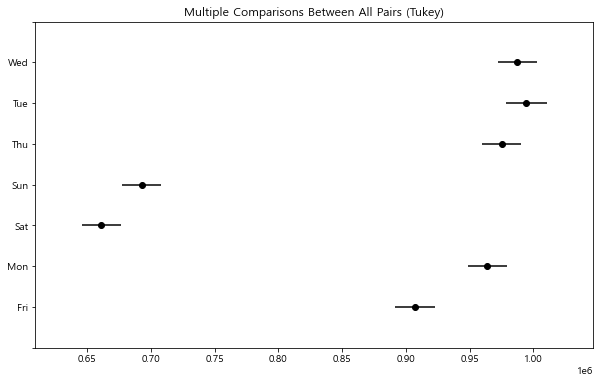

----------------------------------